In [4]:
import numpy as np
import pandas as pd

import healpy as hp

import matplotlib.pyplot as plt
%matplotlib inline 
#show graph inside the notebook


In [47]:
PLA_Data = pd.read_csv("data/planck_simulation/PLA-Results.csv")

# Store the names of the datasets into PLA_Data_List
PLA_Data_List = PLA_Data['SIMULATED_MAP.FILE_ID'].to_list()


# Initialize PLA_Data_Dict : (key:frequnecy, value: [csv path])
PLA_Data_Dict = dict()
for each_csv_path in PLA_Data_List:
    PLA_Data_Dict[each_csv_path[20:23]] = ["data/planck_simulation/"+each_csv_path]
# display(PLA_Data_Dict)

# Read the CMB datasets and store them inside the PLA_Data_Dict
# Update PLA_Data_Dict : (key:frequnecy, value: [csv path, hp map dat ])
for frequency, storage_list in PLA_Data_Dict.items():
    storage_list.append(hp.read_map(storage_list[0]))
# display(PLA_Data_Dict)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


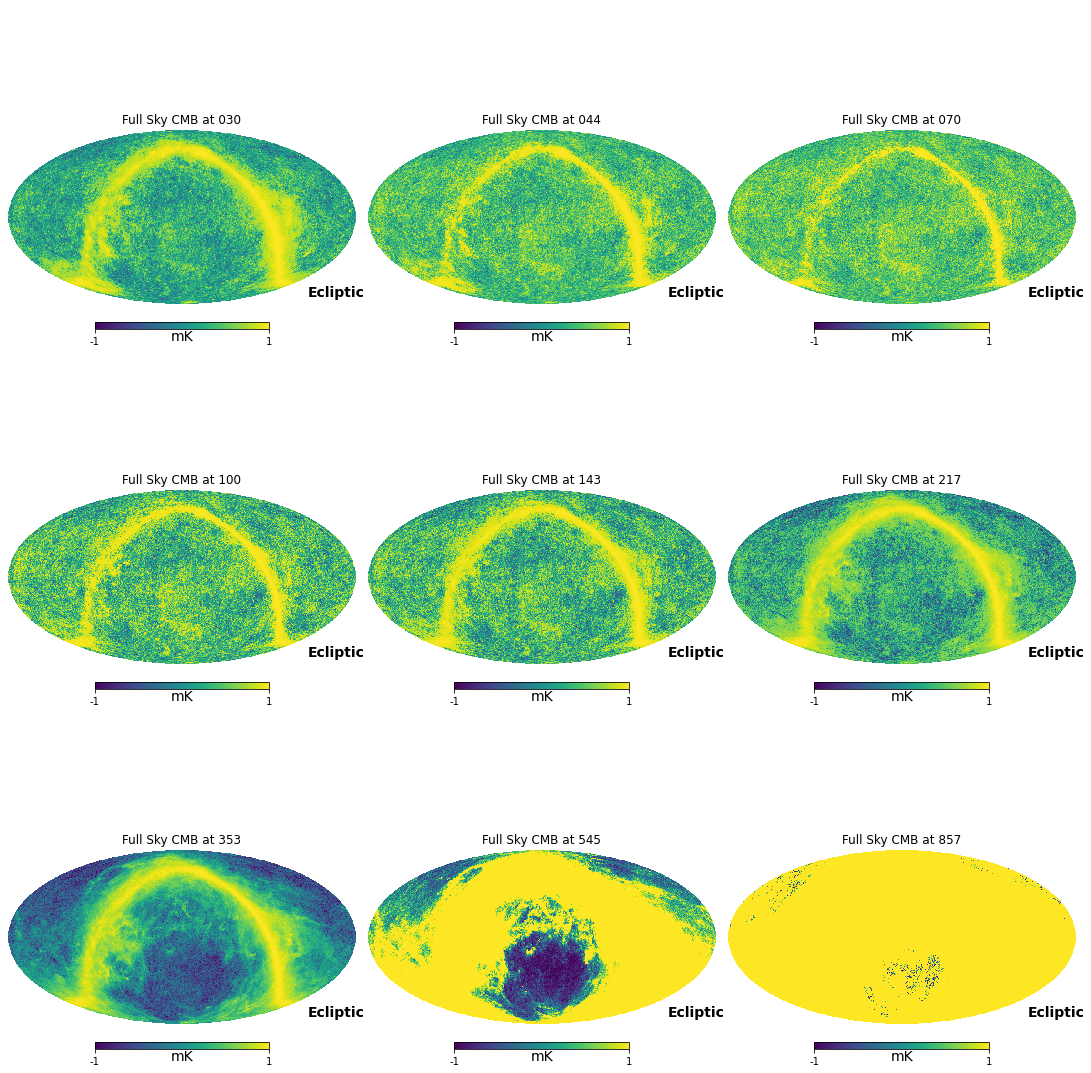

In [66]:
# for frequency in PLA_Data_Dict.keys():
#     # print(frequency)
#     hp.mollview(
#         PLA_Data_Dict[frequency][1],
#         coord=["G", "E"],
#         title="Full Sky CMB at "+frequency,
#         unit="mK",
#         norm="hist",
#         min=-1,
#         max=1,
#     )
#     hp.graticule()
#     # plt.subplot(3,3)
# plt.show()
    
import healpy as hp
import matplotlib.pyplot as plt

# Assuming PLA_Data_Dict is a dictionary where keys are frequencies and values are maps

# Assuming you have frequencies in a list or any iterable
frequencies = PLA_Data_Dict.keys()

# Create a figure with a 3x3 grid of subplots
fig = plt.figure(figsize=(15, 15))

# Iterate over frequencies and corresponding axes
for i, frequency in enumerate(frequencies, start=1):
    # Create a subplot for the current frequency
    ax = fig.add_subplot(3, 3, i)
    
    # Plot the map for the current frequency
    hp.mollview(
        PLA_Data_Dict[frequency][1],
        coord=["G", "E"],
        title="Full Sky CMB at "+frequency,
        unit="mK",
        norm="hist",
        min=-1,
        max=1,
        fig=fig,
        sub=(3, 3, i)  # Specify the subplot position
    )
    ax.axis('off')
    # Add graticule to the map
    # hp.graticule()

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()
